In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#Part 1 : Checking for any missing values 

data = pd.read_csv("C:\\Users\\shrey\\OneDrive\\Desktop\\simplilearn\\project\\MachineLearningProjects\\employee turnover\\dataset\\employee_data.csv")
print(data.info(), "\n-----------------------\n")
#From data.info() we can se there are no missing values in the dataset for any of the features 
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None 
-----------------------

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1             

<h2>Part 2.1 : Correlation HeatMap s</h2>
Correlation for 2 variables is calculated using the below formula. 


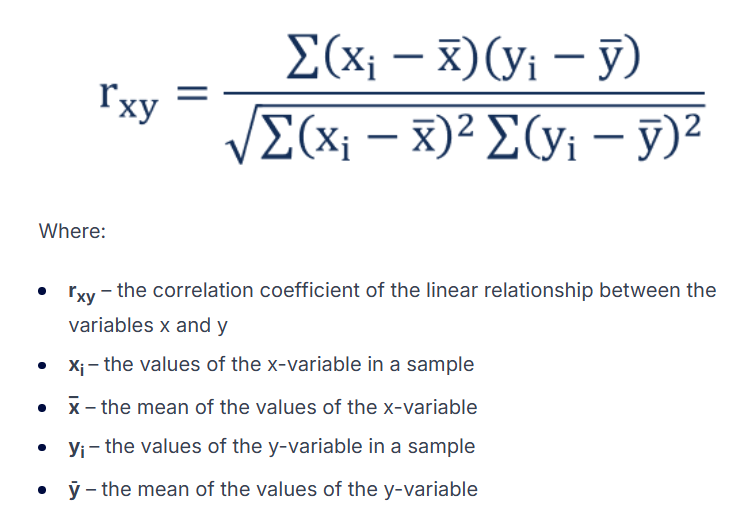

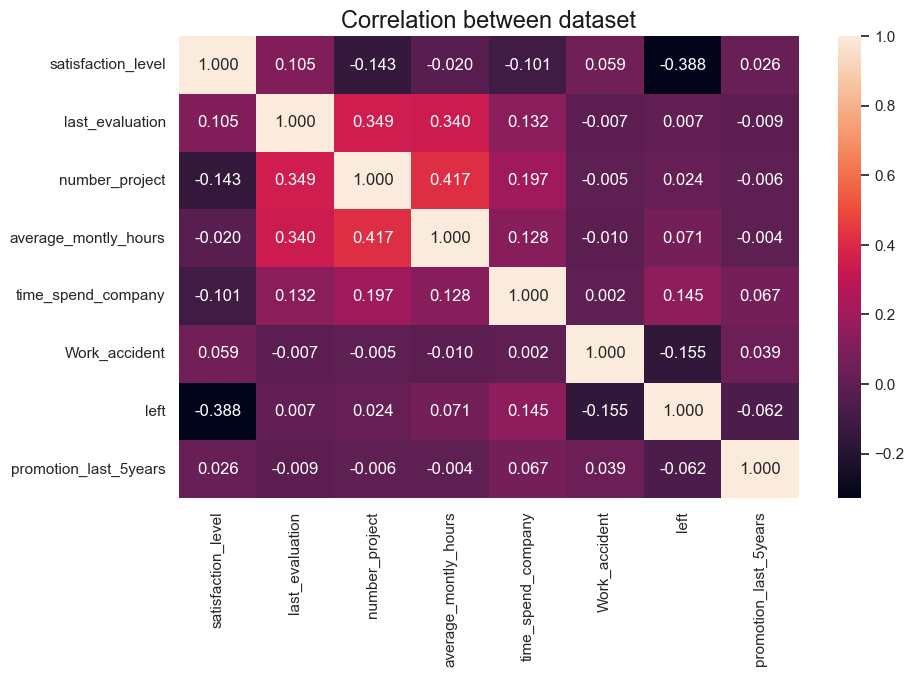

In [42]:
'''
all numerical features : satisfaction_level  last_evaluation  number_project  average_montly_hours time_spend_company(years)
Correlation heatmap :  - The heatmap visualizes the correlation between different features in the dataset,
helping identify highly correlated pairs.
'''

plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,fmt=".3f", robust=True)
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()


<h2>2.2 : Distribution Plot</h2>
Distribution plots plot a univariate distribution of data.

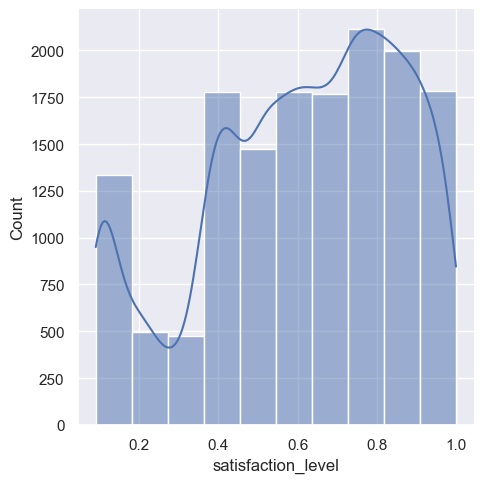

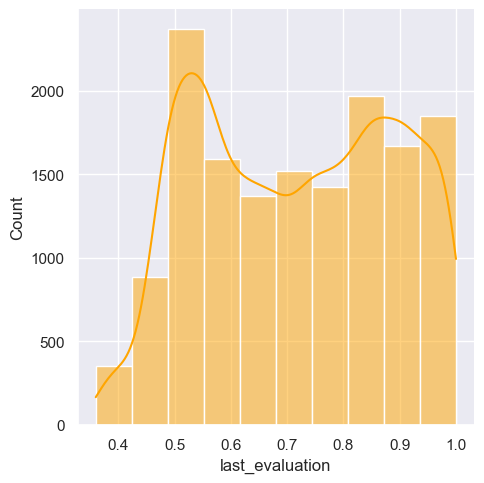

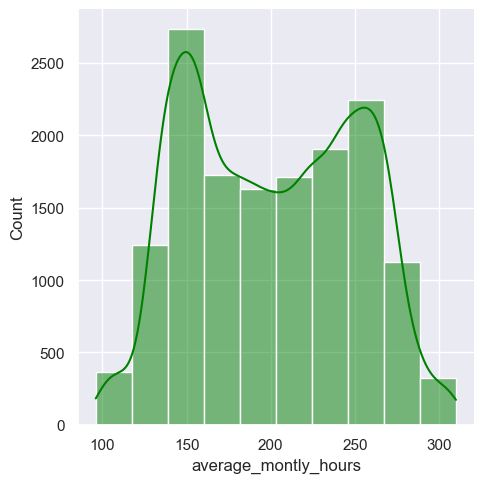

In [43]:
sns.displot(data["satisfaction_level"],  kde = True,bins = 10)

sns.displot(data["last_evaluation"], kde = True, bins = 10, color = "orange")

sns.displot(data["average_montly_hours"], kde = True, bins = 10, color = "green")


<h2>2.3 Bar Plot </h2>

Text(0, 0.5, 'Average no. of project for an employee')

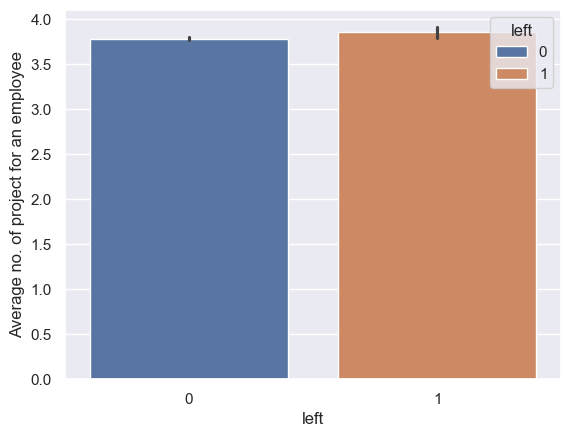

In [44]:
sns.set_theme(style="darkgrid")
sns.barplot(data, x="left", y="number_project", hue="left")
plt.ylabel("Average no. of project for an employee")

<h2> 3 : Clustering </h2>
<h4> 3.1 : Choosing satisfaction_level, last_evaluation and left</h4>

In [45]:
columns_for_clustering = ["satisfaction_level", "last_evaluation"]
employees_who_left = data[data['left']==1]
data_clustering = employees_who_left[columns_for_clustering].values
print(data_clustering)

[[0.38 0.53]
 [0.8  0.86]
 [0.11 0.88]
 ...
 [0.37 0.53]
 [0.11 0.96]
 [0.37 0.52]]


<h4>3.2: K-Means clustering of employees who left into 3 clusters</h4>
K-means clustering is an unsupervised machine learning algorithm that partitions data into k clusters by minimizing the within-cluster variance.

- It groups unlabeled data into clusters by identifying the k number of centroids.
- It assigns every data point to the closest cluster by calculating and using the pairwise Euclidean distance between points.


**k-means++** : instead of randomly selecting the k centroids, K-Means++ improves the initialization by:

<li>Selecting the first centroid randomly from the data points.
<li>Calculating the squared distance 𝐷(𝑥)^2 of all points from the nearest selected centroid.
<li>Sampling the next centroid with probability proportional to 𝐷(𝑥)^2.
<li>Repeating steps 2–3 until 𝑘 k centroids are selected.<br>

**Key Intuition for greedy k-means++**
<li>Higher D(x)^2: Points far from existing centroids are more likely to become new centroids.
<li>Spread-Out Centroids: This ensures centroids are initialized in regions with high data density, reducing convergence time.

In [46]:
from sklearn.cluster import KMeans 
clustering_model = KMeans(n_clusters = 3, n_init = 10, init= "k-means++", random_state=42)
y_kmeans = clustering_model.fit_predict(data_clustering)
y_kmeans


array([0, 1, 2, ..., 0, 2, 0])

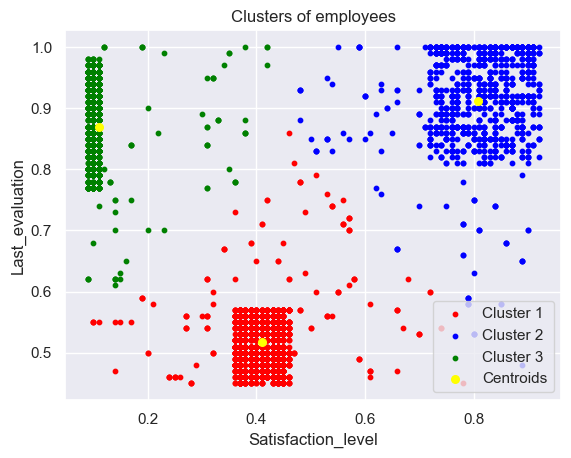

In [47]:
plt.scatter(data_clustering[y_kmeans == 0, 0], data_clustering[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(data_clustering[y_kmeans == 1, 0], data_clustering[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(data_clustering[y_kmeans == 2, 0], data_clustering[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(clustering_model.cluster_centers_[:, 0], clustering_model.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of employees')
plt.xlabel('Satisfaction_level')
plt.ylabel('Last_evaluation')
plt.legend()
plt.show()

<h4> 3.2b : Clustering of people who stayed into 3 groups </h4>

In [48]:
# employees_who_stayed = data[data['left']==0]
# data_clustering_b = employees_who_stayed[columns_for_clustering].values
# print(data_clustering_b)

In [49]:

# clustering_model_b = KMeans(n_clusters = 3, n_init = 10, init= "k-means++", random_state=43)
# y_kmeans_b = clustering_model_b.fit_predict(data_clustering_b)
# y_kmeans_b

In [50]:
# plt.scatter(data_clustering_b[y_kmeans_b == 0, 0], data_clustering_b[y_kmeans_b == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
# plt.scatter(data_clustering_b[y_kmeans_b == 1, 0], data_clustering_b[y_kmeans_b == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
# plt.scatter(data_clustering_b[y_kmeans_b == 2, 0], data_clustering_b[y_kmeans_b == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# plt.scatter(clustering_model_b.cluster_centers_[:, 0], clustering_model_b.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of employees who stayed')
# plt.xlabel('Satisfaction_level')
# plt.ylabel('Last_evaluation')
# plt.legend()
# plt.show()

<h3>Inferences from Cluster Scatter plot of employees who left : </h3>
Cluster 1 : Blue <br>
<li>High satisfaction levels (above 0.6) and high last evaluation scores (above 0.8).
<li>These employees were highly satisfied and performed well.
<li>Possible reasons for leaving:<br>
 --- Overwork or burnout despite good performance.<br>
 --- Lack of career progression or growth opportunities / better offer from elsewhere<br><br>

Cluster 2 : Red <br>
<li>Low to moderate satisfaction levels (around 0.3-0.5) with lower evaluation scores (around 0.5-0.7).
<li>These employees are moderately engaged but show lower performance.
<li>Possible reasons for leaving:<br>
 --- Lack of motivation or poor alignment with the company's goals.<br>
 --- Dissatisfaction with workplace policies or environment.


Cluster 3 : Green <br>
<li>Very low satisfaction levels (below 0.2) with extremely high evaluation scores (around 0.9-1.0)
<li>These employees are unhappy but performed exceptionally well.
<li>Possible reasons for leaving:<br>
 --- Feeling undervalued or underappreciated despite excellent performance<br>


<h2> SMOTE </h2>
<h4> 4.1 : Preprocess data by converting categorical to numerical columns </h4>


In [60]:
#usitg get_dummies, drop to convert categorical tto numerical
X_dummies = pd.get_dummies(data[['department', 'salary']], drop_first=True, dtype='int')
#in drop_first : for department - IT and for salary - high gets dropped
X_dummies.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [61]:
#splitting, converting and then again concatenating 
y = data['left']
X_numerical = data.drop(['left', 'salary', 'department'], axis=1)
X_numerical.head()
X = pd.concat([X_numerical, X_dummies], axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


<h4>4.2 : Stratified split of the dataset</h4>
In an imbalanced dataset, some classes might dominate, while others are underrepresented. A random split might result in the training set containing most of one class and the test set containing little to none of it.
Stratified splitting ensures that both the training and testing sets have the same proportion of each class as the original dataset.

In [58]:
#dividing into 80:20 training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

<h4>4.3 : Handling imbalance for 'left' class using SMOTE</h4>



In [62]:
#checking if data in imbalanced
class_distribution_left_stayed = data['left'].value_counts()
print(class_distribution_left_stayed)

left
0    11428
1     3571
Name: count, dtype: int64


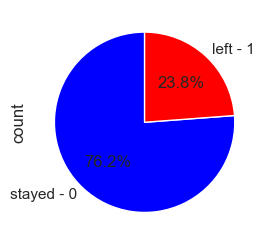

In [64]:
#plotting the distribution of left column 
plt.subplot(1,2,1)
class_distribution_left_stayed.plot(kind='pie', labels = ['stayed - 0', 'left - 1'], colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
plt.show()

**Observation** <br>
The data is clearly imbalanced. using this data has its disadvanatages like bias towars people who stayed. The model may predict 'stayed' more often due to their dominance, leading to poor performance.<br>

**SMOTE**<br>
Use it when the minority class is seriously underrepresented. It as an oversampling method, increases the number of minority class samples by generating new synthetic ones. working :

- Selecting a random minority class sample.
- Finding its k-nearest neighbors (usually k=5).
- Choosing one of these neighbors and creating a synthetic sample along the line segment joining the original sample and the neighbor.



In [72]:
#Standardization scaling 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)


[[ 1.55539086 -0.61934644 -0.65341156 ... -0.47026373  1.02660601
  -0.87053873]
 [-1.81839394  0.37200735  0.15695385 ...  2.12646636 -0.97408353
  -0.87053873]
 [ 0.75210876  0.48863721 -0.65341156 ... -0.47026373 -0.97408353
   1.14871397]
 ...
 [ 0.18981129  0.08043271  0.96731926 ... -0.47026373 -0.97408353
   1.14871397]
 [ 0.71194466  1.65493579  0.15695385 ... -0.47026373  1.02660601
  -0.87053873]
 [ 1.47506265  0.83852678 -1.46377697 ... -0.47026373  1.02660601
  -0.87053873]]


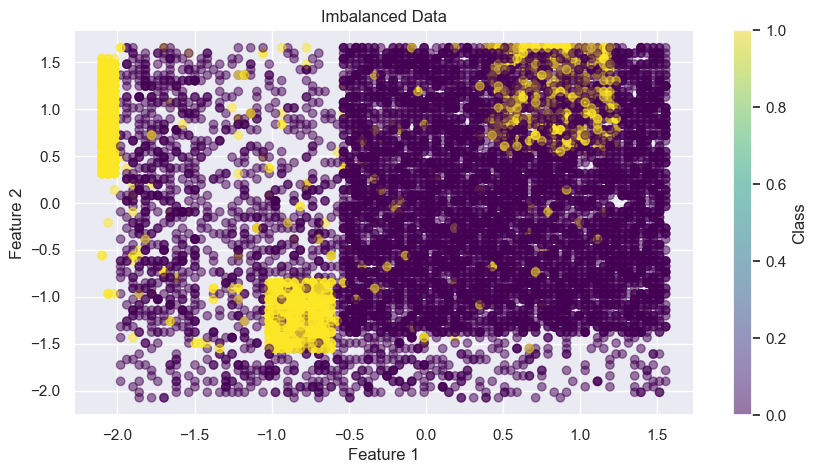

In [67]:
#plottig imbalance from training set again, only on basis of first 2 features for now 
#thhis isn't exactly very useful to us right now, but helps with comparison of the smote 
#data that wil come after it
plt.figure(figsize=(10, 5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.5, cmap='viridis', marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')

left
0    9134
1    9134
Name: count, dtype: int64


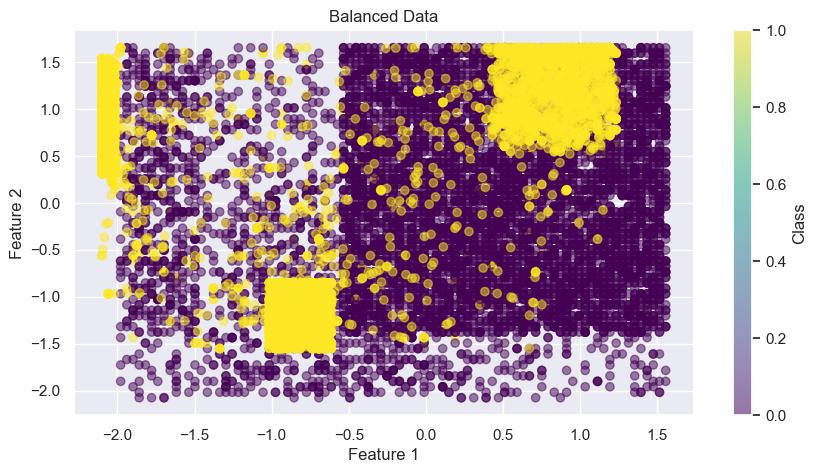

In [84]:
#Applying SMOTE - Synthetic minority over-samplification technique and plotting
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
smote_balanced_data = y_train_smote.value_counts()
print(smote_balanced_data)

plt.figure(figsize=(10, 5))
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c=y_train_smote, alpha=0.5, cmap='viridis', marker='o')
plt.title('Balanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')


<h2> 5: Model Training and Evaluation Performance </h2>
<h4> 5.1 Logistic regression </h4>


In [111]:
#used for binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, mean_squared_error, r2_score


logistic_regression_model = LogisticRegression(max_iter = 100000, random_state = 123)

# crss-validation 
K = 5
kf = KFold(n_splits = K, shuffle = True, random_state = 123)

scores_lr = cross_val_score(logistic_regression_model, X_train_smote, y_train_smote, cv = kf, scoring = 'accuracy',n_jobs=-1 )
print(f"Logistic Regression CV mean accuracy: ", scores_lr.mean())


#training the model 
logistic_regression_model.fit(X_train_smote, y_train_smote)

#cross_val_predict gives the same results as using : 
#y_train_pred_lr = logistic_regression_model.predict(X_train_smote)

y_train_pred_lr = cross_val_predict(logistic_regression_model, X_train_smote, y_train_smote, cv = kf)



print("\n CLASSIFICATION REPORT LOGISTIC REGRESSION FROM CV  ")
#classification report using cross-validation results on x_train_smote
report_lr = classification_report(y_train_smote, y_train_pred_lr)
print(report_lr)
#calculating mean square error 
train_mse_lr = mean_squared_error(y_train_smote, y_train_pred_lr)
print(f"Train MSE: {train_mse_lr}")

train_r2 = r2_score(y_train_smote, y_train_pred_lr)
print(f"Train R-squared: {train_r2}")




Logistic Regression CV mean accuracy:  0.7785741480673375

 CLASSIFICATION REPORT LOGISTIC REGRESSION FROM CV  
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      9134
           1       0.76      0.81      0.78      9134

    accuracy                           0.78     18268
   macro avg       0.78      0.78      0.78     18268
weighted avg       0.78      0.78      0.78     18268

Train MSE: 0.2214254433982921
Train R-squared: 0.11429822640683163


<h4> 5.2 Random Forrest </h4>


In [102]:
from sklearn.ensemble import RandomForestClassifier
# setting up model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

#appying k-fold
scores_rf = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=kf, scoring='accuracy', n_jobs=-1)
print(f"Random Forest CV mean accuracy: {scores_rf.mean()}")

#training and fitting and predicting udinf model
rf_model.fit(X_train_smote, y_train_smote)
y_test_pred_rf = rf_model.predict(X_test_scaled)

#metrics
print("\nCLASSIFICATION REPORT RANDOM FOREST")
report_rf = classification_report(y_test, y_test_pred_rf)
print(report_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
print(f"Test MSE: {test_mse_rf}")
test_r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"Test R-squared: {test_r2_rf}")




Random Forest CV mean accuracy: 0.9885591930873561

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.97      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Test MSE: 0.013
Test R-squared: 0.9277583349592853


<h4>5.3 Gradient Boosting </h4>


In [103]:
from sklearn.ensemble import GradientBoostingClassifier
# setting up model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=123)

#appying k-fold
scores_gb = cross_val_score(gb_model, X_train_smote, y_train_smote, cv=kf, scoring='accuracy', n_jobs=-1)
print(f"Gradient Boosting CV mean accuracy: {scores_gb.mean()}")

# Train Gradient Boosting, fitting and predicting using  model
gb_model.fit(X_train_smote, y_train_smote)
y_test_pred_gb = gb_model.predict(X_test_scaled)

#metrics
print("\nCLASSIFICATION REPORT GRADIENT BOOSTING")
report_gb = classification_report(y_test, y_test_pred_gb)
print(report_gb)
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)
print(f"Test MSE: {test_mse_gb}")
test_r2_gb = r2_score(y_test, y_test_pred_gb)
print(f"Test R-squared: {test_r2_gb}")

Gradient Boosting CV mean accuracy: 0.9664985074237744

CLASSIFICATION REPORT GRADIENT BOOSTING
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2294
           1       0.94      0.94      0.94       706

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

Test MSE: 0.029333333333333333
Test R-squared: 0.8369931660619772


<h2> 6 : BEST MODEL </h2>
<h4> 6.1 : ROC/AUC for all 3 models </h4>


In [ ]:
from sklearn.metrics import roc_curve, auc